Import

In [68]:
import graphviz #graphiz is a graph visualization software
import sklearn 
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()


Model

In [69]:
#NOTE: DON'T REQUIRE SCALING
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf= 2, min_samples_split=20) 
#max_depth: The maximum depth of the tree.
#random_state: Controls the randomness of the estimator.
#min_samples_leaf: The minimum number of samples required to be at a leaf node.
#min_samples_split: The minimum number of samples required to split an internal node.

# Fit the model on the training data
dt_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_clf.predict(X_test)


Evaluation

In [76]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("----------Decision Tree Classifier Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct


#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr1 = classification_report(y_test, y_pred)
print(cr1)



----------Decision Tree Classifier Metrics----------

Accuracy: 0.9
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1 Score: 0.918918918918919

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.89      0.94      0.92        36

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



Graph

In [71]:
#visualize the tree using graphviz 
from sklearn.tree import export_graphviz 
'''
export_graphviz(
        dt_clf, #the decision tree classifier
        out_file="C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\ML\\heart_tree4.dot", #the file to which the tree is exported
        feature_names= features, 
        class_names=target_names, 
        rounded=True, #rounded corners
        filled=True #color the boxes
)

#convert the dot file to png file in cmd
#use the following command:
#dot -Tpng heart_tree4.dot -o heart_tree.png
'''

'\nexport_graphviz(\n        dt_clf, #the decision tree classifier\n        out_file="C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\ML\\heart_tree4.dot", #the file to which the tree is exported\n        feature_names= features, \n        class_names=target_names, \n        rounded=True, #rounded corners\n        filled=True #color the boxes\n)\n\n#convert the dot file to png file in cmd\n#use the following command:\n#dot -Tpng heart_tree4.dot -o heart_tree.png\n'

Confusion Matrics

[[20  4]
 [ 2 34]]


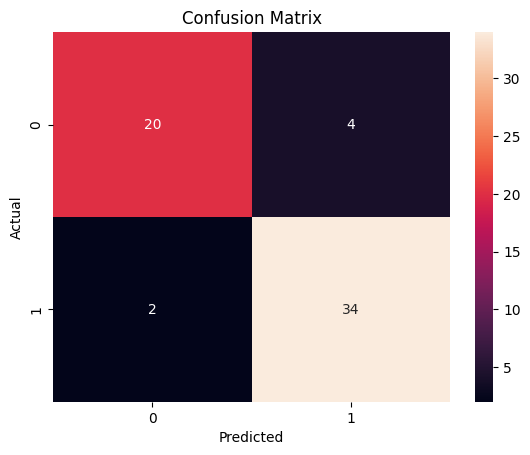

In [73]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Cross validation

In [72]:
#cross validaayion for 10 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_train, y_train, cv=10, scoring="accuracy") #scorinf can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
#get the mean of the scores
print("Mean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #the lower the standard deviation, the better the model
#standard deviation is calculated for the scores of each fold

Fold 0 : 0.75
Fold 1 : 0.8333333333333334
Fold 2 : 0.8333333333333334
Fold 3 : 0.7916666666666666
Fold 4 : 0.5833333333333334
Fold 5 : 0.625
Fold 6 : 0.6666666666666666
Fold 7 : 0.7083333333333334
Fold 8 : 0.7916666666666666
Fold 9 : 0.7391304347826086
Mean: 0.7322463768115942
Standard Deviation: 0.08149274846837636
